In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Load the Dataset

In [2]:
df = pd.read_csv("CompanyFinancials2025.csv")
df.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,A,Agilent Technologies,Life Sciences Tools & Services,151.52,34.126125,NaN,NaN,124.16,155.35,4.327336e+10,NaN,NaN,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AAPL,Apple Inc.,"Technology Hardware, Storage & Peripherals",236.00,37.760000,0.0042,6.25,164.08,260.10,3.572850e+12,1.346610e+11,9.136909,62.649323,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABBV,AbbVie,Biotechnology,183.90,64.300700,0.0373,2.86,153.58,207.32,3.249770e+11,2.563000e+10,5.851963,53.882210,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABNB,Airbnb,"Hotels, Resorts & Cruise Lines",131.17,45.387543,NaN,2.89,110.38,170.10,8.195133e+10,1.673000e+09,7.560086,9.859441,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ABT,Abbott Laboratories,Health Care Equipment,127.93,16.744764,0.0202,7.64,99.71,129.85,2.218890e+11,1.082500e+10,5.383446,5.575749,http://www.sec.gov/cgi-bin/browse-edgar?action...


### Initial Data Inspection

In [3]:
df.info()
df.describe()

#Checking the missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          503 non-null    object 
 1   Name            503 non-null    object 
 2   Sector          503 non-null    object 
 3   Price           500 non-null    float64
 4   Price/Earnings  475 non-null    float64
 5   Dividend Yield  404 non-null    float64
 6   Earnings/Share  499 non-null    float64
 7   52 Week Low     500 non-null    float64
 8   52 Week High    500 non-null    float64
 9   Market Cap      500 non-null    float64
 10  EBITDA          470 non-null    float64
 11  Price/Sales     499 non-null    float64
 12  Price/Book      468 non-null    float64
 13  SEC Filings     503 non-null    object 
dtypes: float64(10), object(4)
memory usage: 55.1+ KB


Symbol             0
Name               0
Sector             0
Price              3
Price/Earnings    28
Dividend Yield    99
Earnings/Share     4
52 Week Low        3
52 Week High       3
Market Cap         3
EBITDA            33
Price/Sales        4
Price/Book        35
SEC Filings        0
dtype: int64

### Clean Column Names

In [4]:
df_clean = df.copy()

### Data Cleaning

In [5]:

#fill missing values with nans
df_clean = df.copy()

df_clean.fillna({
    'Price': df_clean['Price'].median(),
    'Price/Earnings': df_clean['Price/Earnings'].median(),
    'Dividend Yield': df_clean['Dividend Yield'].median(),
    'Earnings/Share': df_clean['Earnings/Share'].median(),
    '52 Week Low': df_clean['52 Week Low'].median(),
    '52 Week High': df_clean['52 Week High'].median(),
    'Market Cap': df_clean['Market Cap'].median(),
    'EBITDA': df_clean['EBITDA'].median(),
    'Price/Sales': df_clean['Price/Sales'].median(),
    'Price/Book': df_clean['Price/Book'].median()
    
}, inplace=True)

df_clean.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,A,Agilent Technologies,Life Sciences Tools & Services,151.52,34.126125,0.01995,5.24,124.16,155.35,4.327336e+10,2.965374e+09,3.291713,3.580510,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AAPL,Apple Inc.,"Technology Hardware, Storage & Peripherals",236.00,37.760000,0.00420,6.25,164.08,260.10,3.572850e+12,1.346610e+11,9.136909,62.649323,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABBV,AbbVie,Biotechnology,183.90,64.300700,0.03730,2.86,153.58,207.32,3.249770e+11,2.563000e+10,5.851963,53.882210,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABNB,Airbnb,"Hotels, Resorts & Cruise Lines",131.17,45.387543,0.01995,2.89,110.38,170.10,8.195133e+10,1.673000e+09,7.560086,9.859441,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ABT,Abbott Laboratories,Health Care Equipment,127.93,16.744764,0.02020,7.64,99.71,129.85,2.218890e+11,1.082500e+10,5.383446,5.575749,http://www.sec.gov/cgi-bin/browse-edgar?action...


### Exploratory Data Analysis

Sector Distribution (Pie Chart)

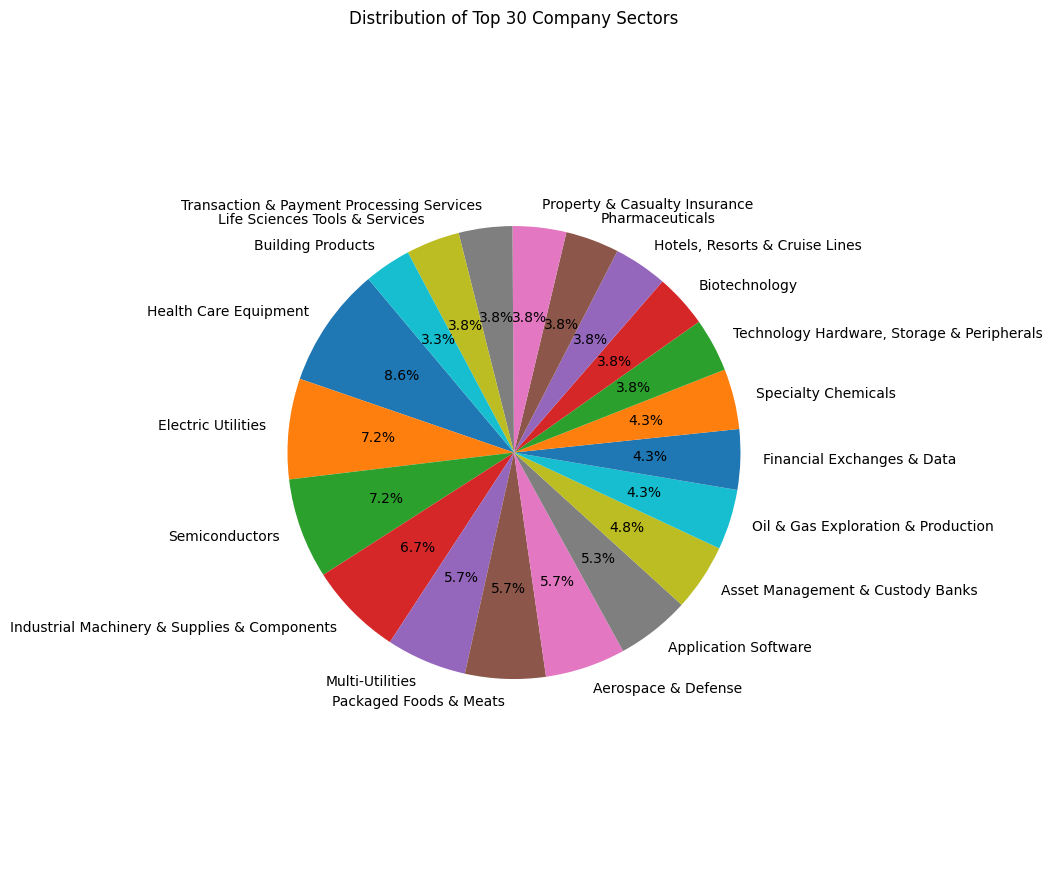

In [6]:
# Top 30 most frequent sectors
sector_counts = df_clean['Sector'].value_counts().head(20)

plt.figure(figsize=(10,9))
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=130)
plt.title('Distribution of Top 30 Company Sectors')
plt.axis('equal')  #to Keeps the pie chart circular
plt.tight_layout()
plt.show()

### Top 30 Sectors by Average Price/Earnings

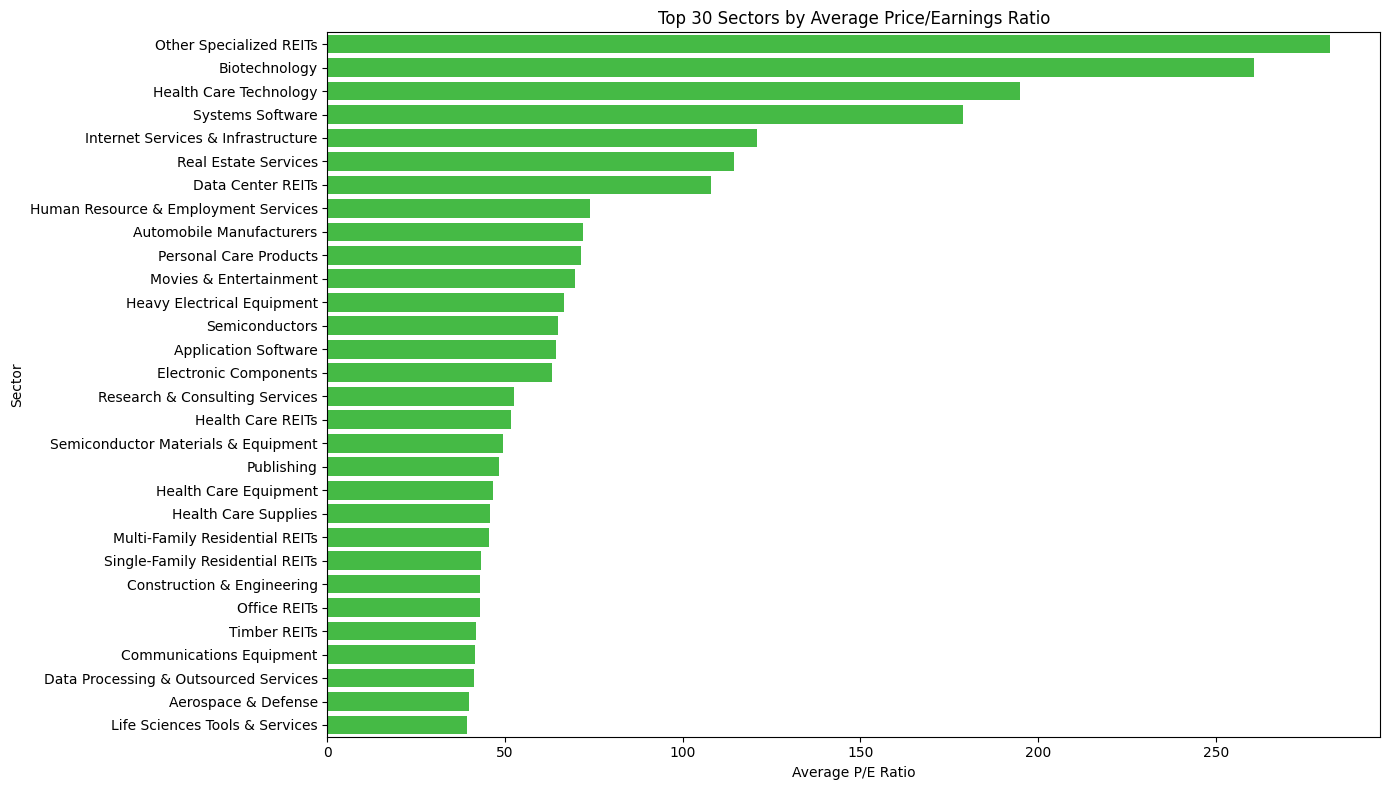

In [7]:
pe_by_sector = df_clean.groupby('Sector')['Price/Earnings'].mean().sort_values(ascending=False)
top30_pe = pe_by_sector.head(30)

plt.figure(figsize=(14, 8))
sns.barplot(x=top30_pe.values, y=top30_pe.index, color="limegreen")
plt.title('Top 30 Sectors by Average Price/Earnings Ratio')
plt.xlabel('Average P/E Ratio')
plt.ylabel('Sector')
plt.tight_layout()
plt.show()

## Correlation Matrix

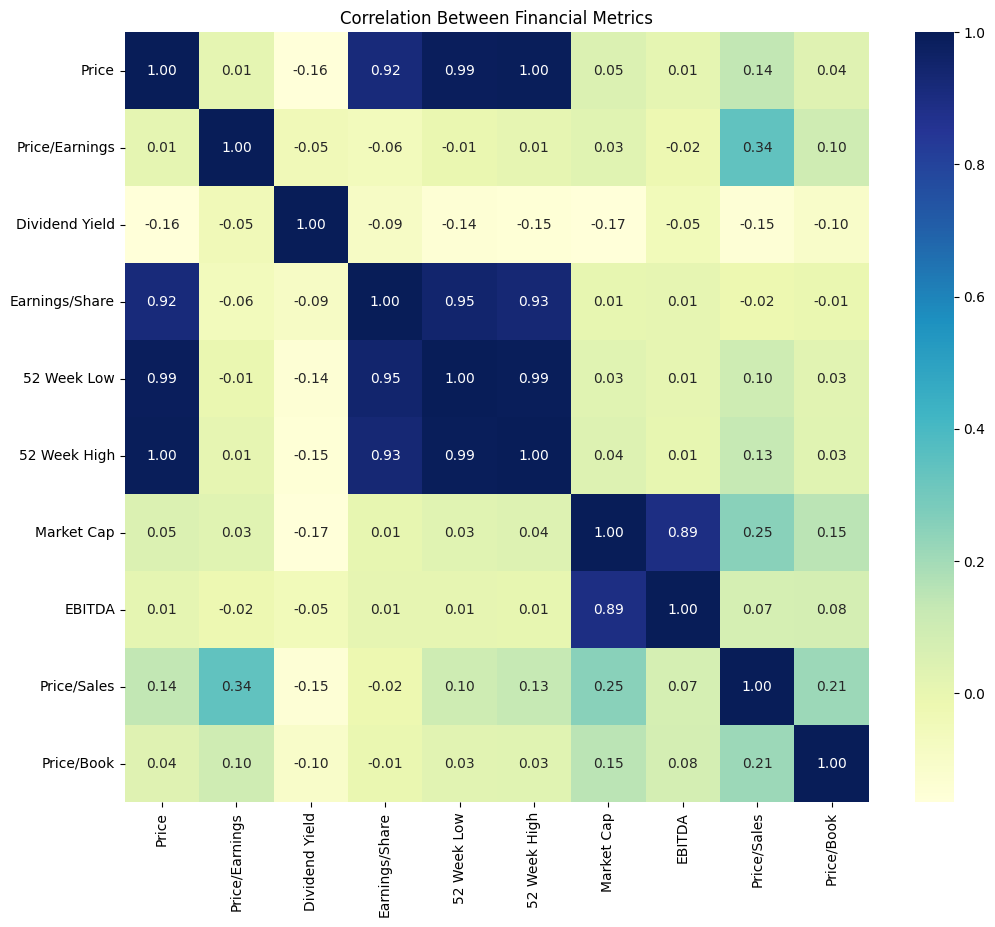

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Between Financial Metrics')
plt.show()

## Top 30 Companies by Market Cap (Scatter Plot)

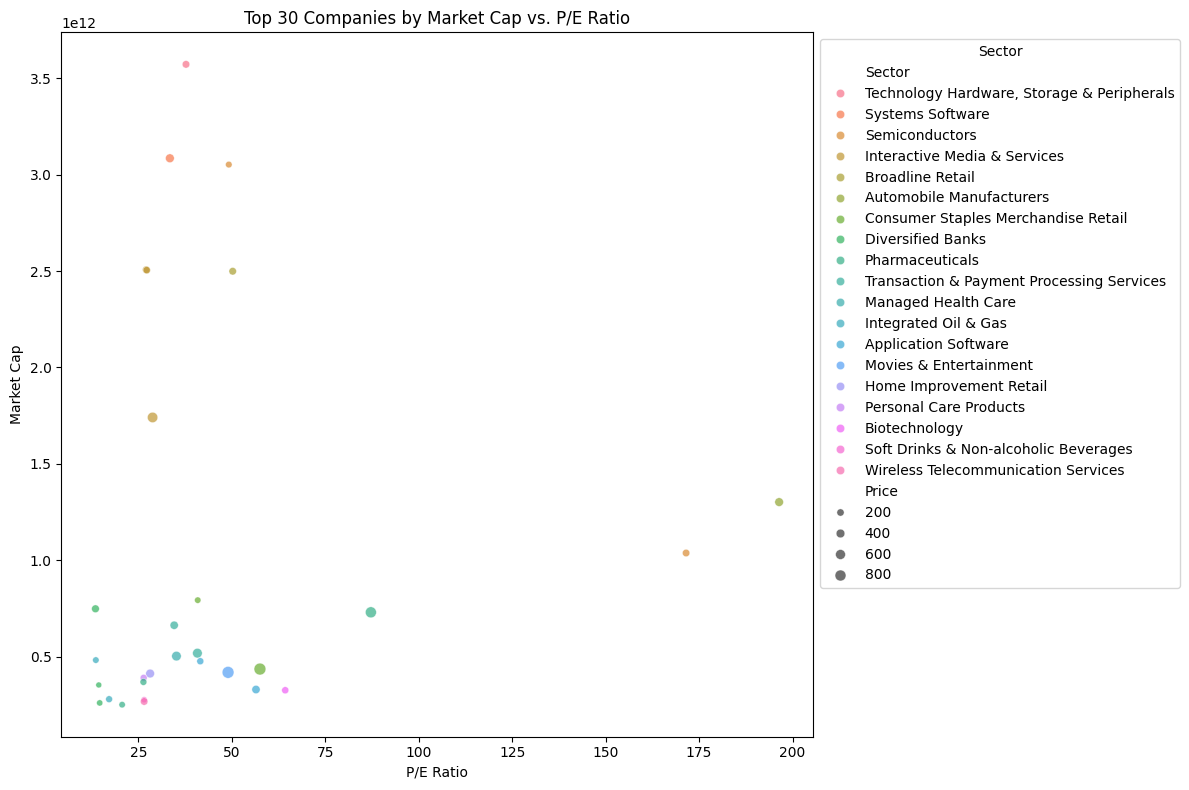

In [9]:
top30 = df_clean[df_clean['Price/Earnings'].notna()].nlargest(30, 'Market Cap')

plt.figure(figsize=(12, 8))
sns.scatterplot(data=top30, x='Price/Earnings', y='Market Cap', hue='Sector', size='Price', alpha=0.7)
plt.title('Top 30 Companies by Market Cap vs. P/E Ratio')
plt.xlabel('P/E Ratio')
plt.ylabel('Market Cap')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Sector')
plt.tight_layout()
plt.show()

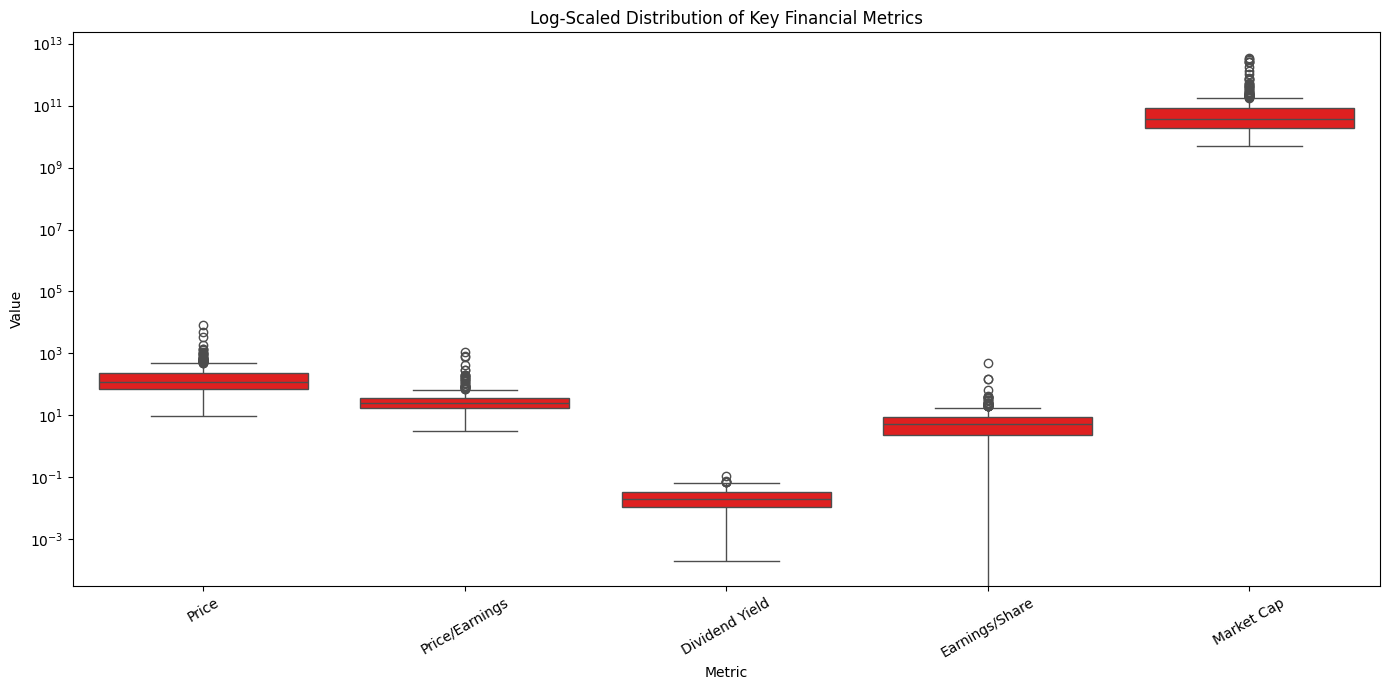

In [10]:

# Select columns to plot
cols_to_plot = ['Price', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share', 'Market Cap']

# # Melt the dataframe to long-form
df_melted = df[cols_to_plot].melt(var_name="Metric", value_name="Value")

# Main plot with log scale
plt.figure(figsize=(14, 7))
sns.boxplot(x="Metric", y="Value", data=df_melted,color = 'red')
plt.yscale('log')
plt.title("Log-Scaled Distribution of Key Financial Metrics")
plt.xticks(rotation=30)
plt.tight_layout()

plt.show()

This boxplot uses a logarithmic scale to compare the distribution of key financial metrics across companies.

### *Scatter Plot: Price vs 52 Week High/Low*

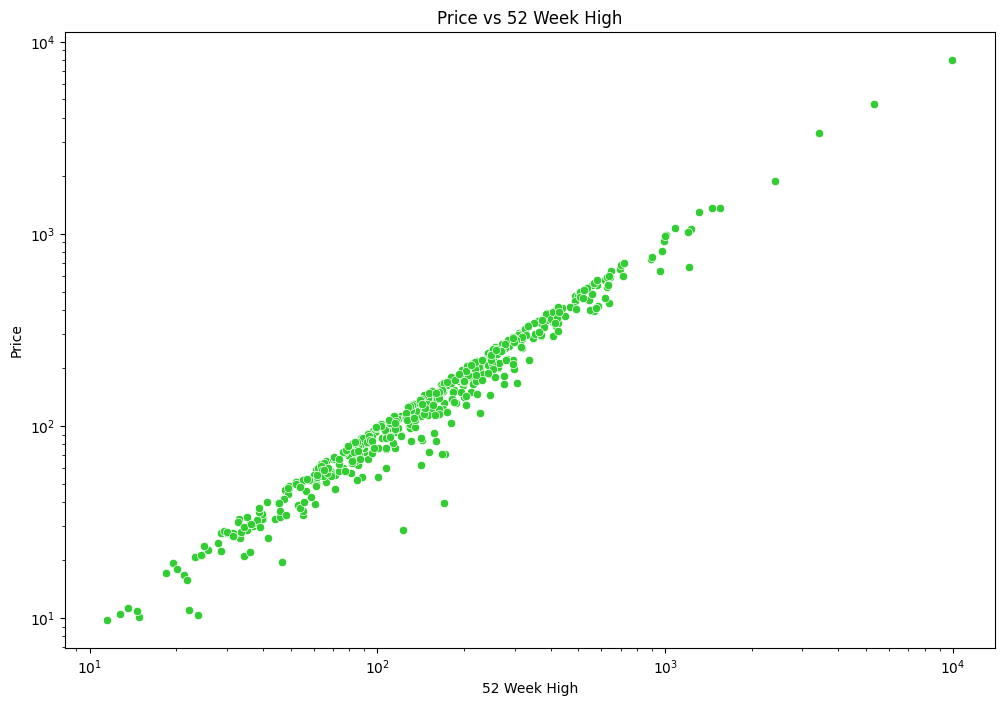

In [11]:

plt.figure(figsize=(12, 8))

# Scatter plot
sns.scatterplot(data=df, x='52 Week High', y='Price',color='limegreen')

# Title and scales
plt.title('Price vs 52 Week High')
plt.xscale('log')
plt.yscale('log')

# Display plot
plt.show()



## Summary :

- **Technology** and **Healthcare** dominate in terms of number of companies.
- Some sectors show extremely high average P/E ratios, hinting at growth stocks or overvaluation.
- **Market Cap** correlates strongly with Price and Earnings.
- Sector-wise variance in profitability (Earnings per Share) is significant, with some sectors clearly outperforming others.
